# Predicting Hotel Booking Cancellations: Building a Naive Bayes Model - Assignment



# import the main library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score,confusion_matrix,accuracy_score,r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn import tree
# from google.colab import files


C:\Users\admin\AppData\Local\Temp\ipykernel_12200\4234302453.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Read the hotel dataset.


In [2]:
df= pd.read_csv(r'C:\Users\admin\OneDrive\Desktop\Machine learning Assingments\Supervised machiner learning\2_clasificaton\hotel.csv')


In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
hotel_data=df.copy()

# Q-2  Exploratory Data Analysis (EDA) - Show the Data quality check, treat the missing values, etc if any.


In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Understands the data

In [6]:
df.shape

(119390, 32)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
df=df.drop(['company','country'],axis=1)

In [9]:
df.shape

(119390, 30)

# Here we creating the profiling to understand the data

In [10]:
! pip install pandas-profiling


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
from ydata_profiling import ProfileReport

prof = ProfileReport(df)
prof.to_file(output_file='output.html')


ModuleNotFoundError: No module named 'ydata_profiling'

finding the the missing values in our dataset

In [11]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0
customer_type                         0


fill the missing values by the help of using Simpleimputer

In [12]:
# here we using the simple imputer to treat the missing values
imputer = SimpleImputer(strategy="median")
df[['children']] = imputer.fit_transform(df[['children']])
imputer = SimpleImputer(strategy="most_frequent")
df[['agent']] = imputer.fit_transform(df[['agent']])


In [13]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

find the duplicate values

In [14]:
df.duplicated().sum()

33763

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(85627, 30)

 # Analyze the categorical data.


<Axes: xlabel='reservation_status', ylabel='count'>

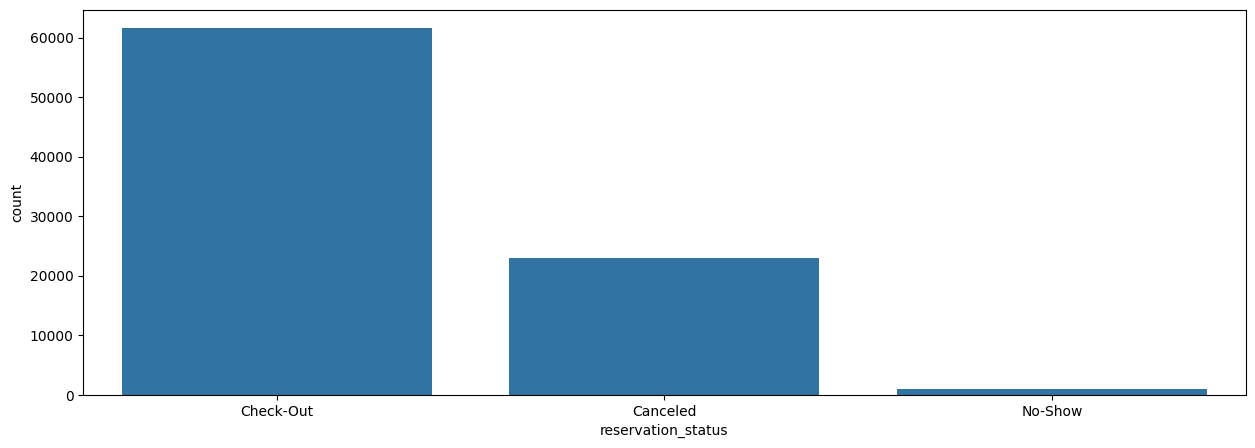

In [18]:
import matplotlib.pyplot as plt # here we plot the graph to knoew the reservation status 
import seaborn as sns
plt.figure(figsize=(15,5))
sns.countplot(df,x='reservation_status')

Most of the customer check out as compair to canceled reservation

<Axes: xlabel='customer_type', ylabel='count'>

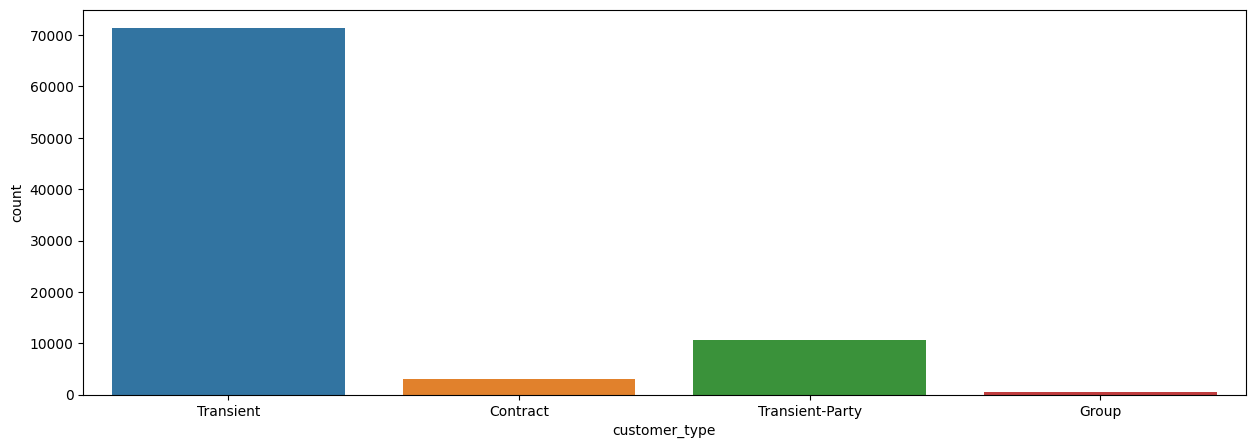

In [19]:
plt.figure(figsize=(15,5)) # Here we plot the count plot to know the customer type 
sns.countplot(df,x='customer_type',hue='customer_type')

This graph showing the Transient  type of customer is more as compaire to other

<Axes: xlabel='deposit_type', ylabel='count'>

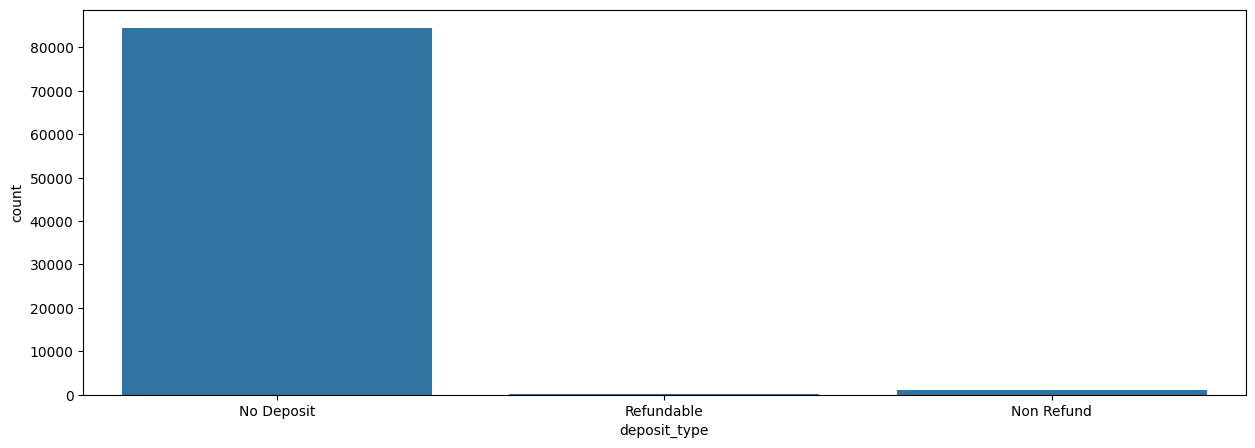

In [20]:
plt.figure(figsize=(15,5)) # here  we plot the count plot to know the how much customer deposit type
sns.countplot(df,x='deposit_type')

Most of the customer no deposit

<Axes: xlabel='assigned_room_type', ylabel='count'>

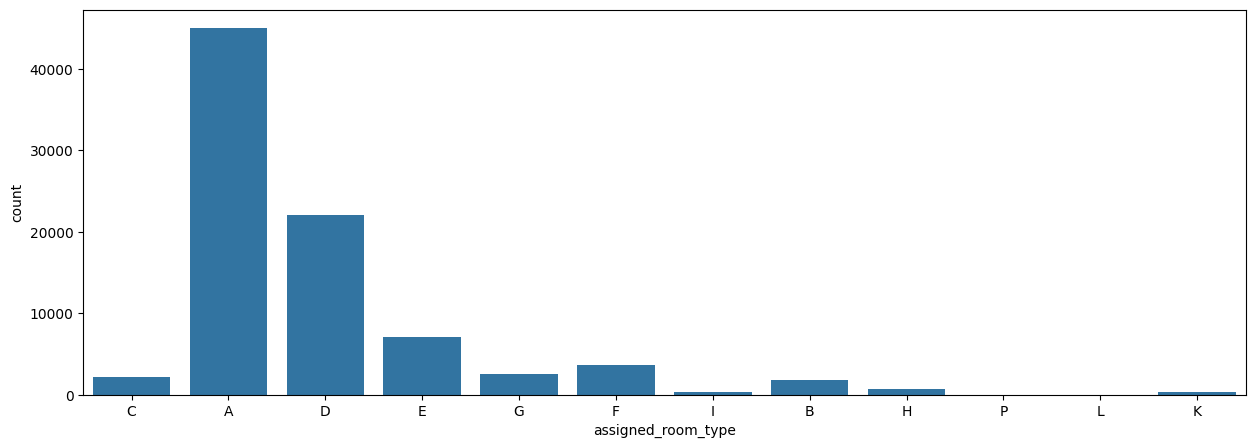

In [21]:
plt.figure(figsize=(15,5)) # 
sns.countplot(df,x='assigned_room_type')

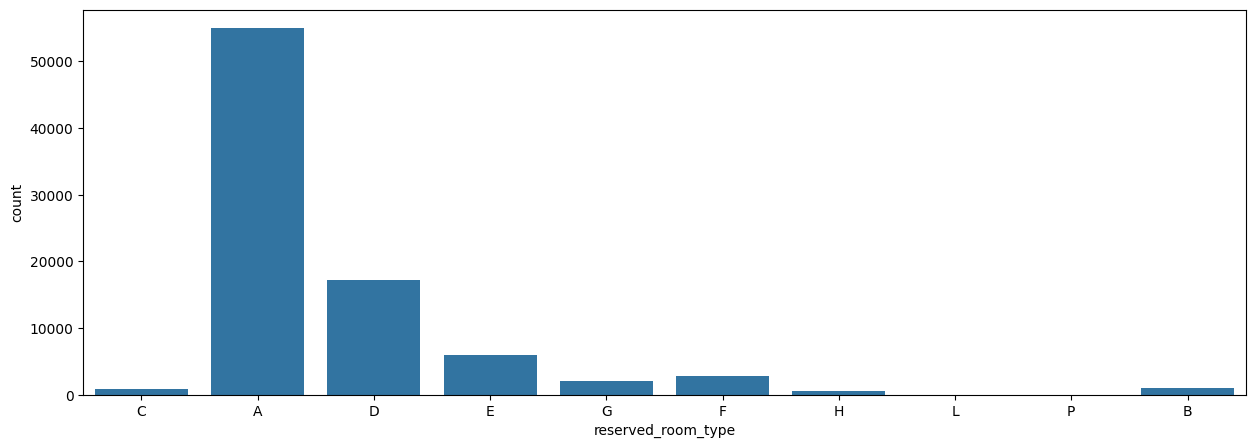

In [22]:
plt.figure(figsize=(15,5))

sns.countplot(df,x='reserved_room_type',)
plt.show()

This plot providing the important insite for customer fevert room type most of the customer reserved the A type room

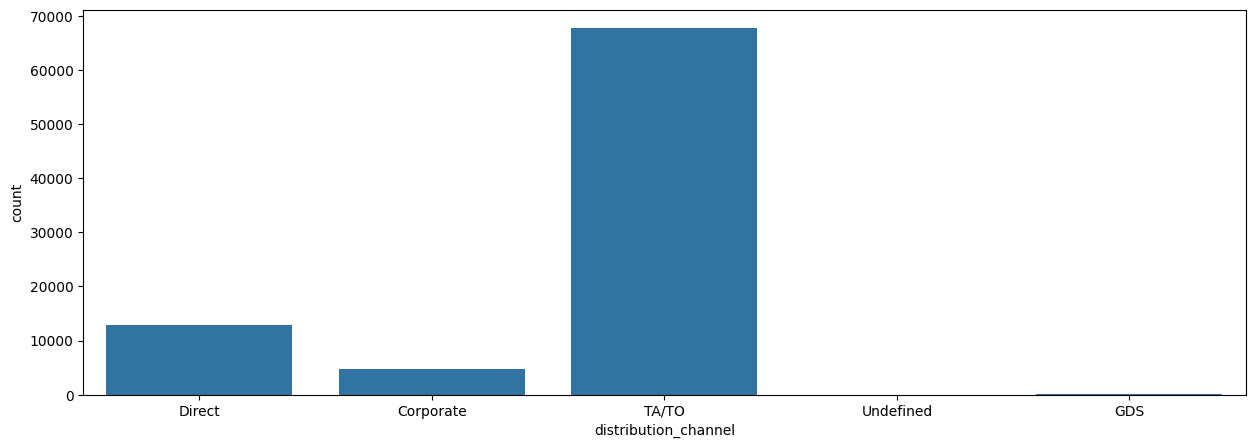

In [23]:
plt.figure(figsize=(15,5)) # This plot is using to know how to come our cutmeor in our hotel 

sns.countplot(df,x='distribution_channel',)
plt.show()

This plot provide the information about the chennel of the customer how to reach our hotel 
most of the customer  come from the travel agent and travel offivce and secondly direct

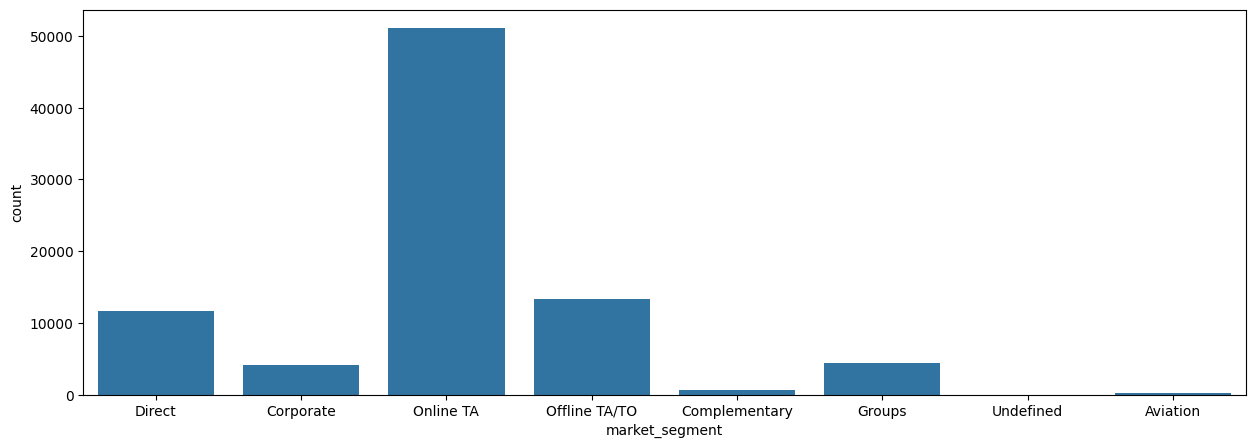

In [24]:
plt.figure(figsize=(15,5)) # here we plot a count plot to know the what the market segment of the customer 

sns.countplot(df,x='market_segment',)
plt.show()

This  graph provide the most important insit abiut the how reach customer to our hotel so most of the traveler agent book our hotel online second largert ofline traveler agent Direct customer is less as compair to the traveler agent

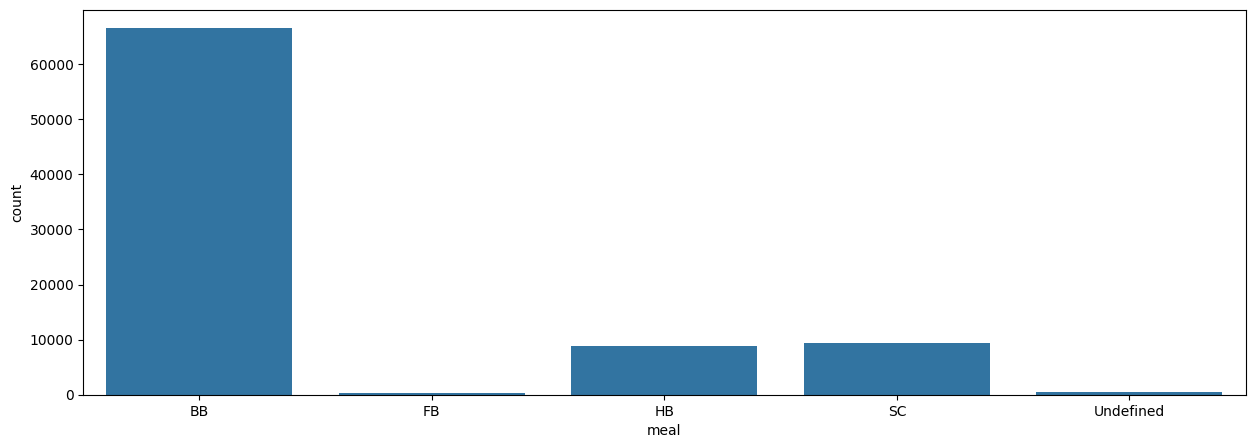

In [25]:
plt.figure(figsize=(15,5))

sns.countplot(df,x='meal')
plt.show()

This plot giv me the insit regarding tio the custome which food most like  bb is the top food of our hotel 

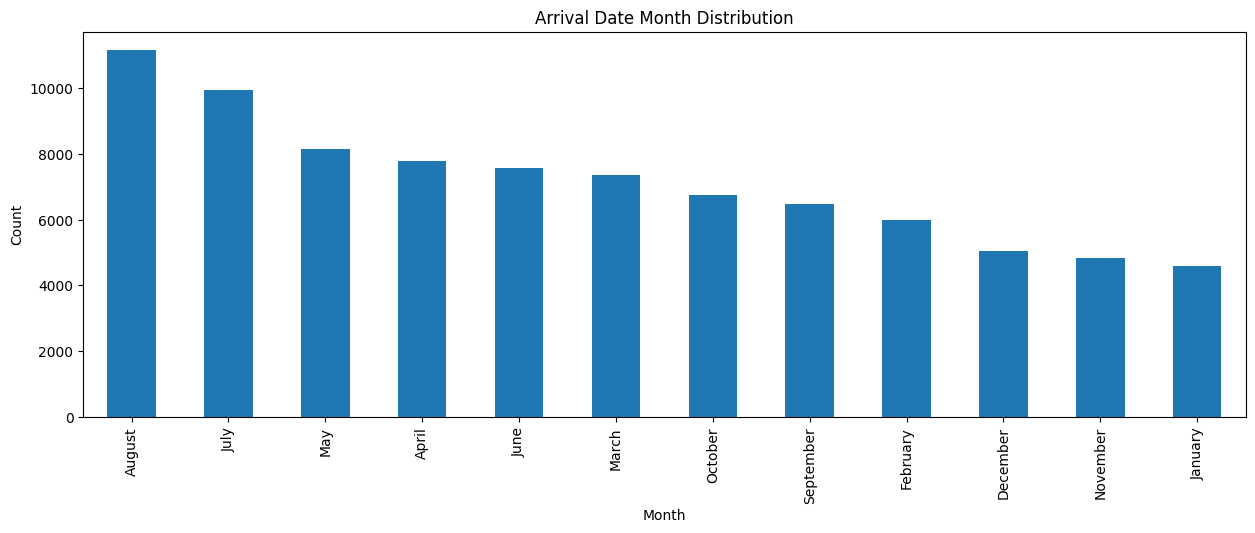

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
df['arrival_date_month'].value_counts().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Arrival Date Month Distribution')
plt.show()


This plot provide the information about the customer which month most visited in our hotel in Augest is top month and january minimum customer come in our  hotel

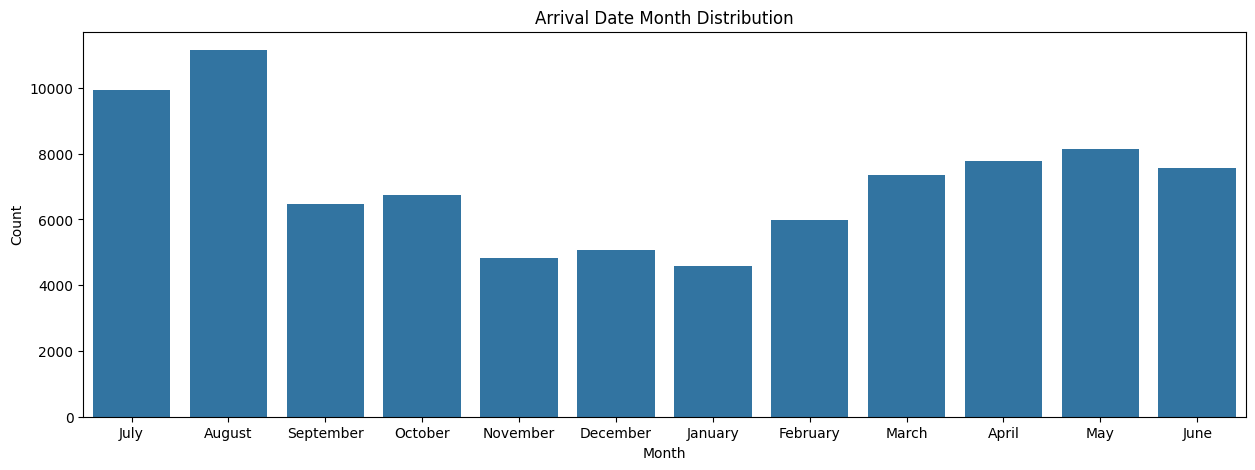

In [27]:
plt.figure(figsize=(15,5))

sns.countplot(df,x='arrival_date_month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Arrival Date Month Distribution')
plt.show()

# spliting the dependent or independ features

In [28]:
X = df.drop('is_canceled', axis=1)
X.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,342,2015,July,27,1,0,0,2,0.0,...,3,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,737,2015,July,27,1,0,0,2,0.0,...,4,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,7,2015,July,27,1,0,1,1,0.0,...,0,No Deposit,9.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,13,2015,July,27,1,0,1,1,0.0,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,14,2015,July,27,1,0,2,2,0.0,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [29]:
y=df['is_canceled']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

# here we segriget the numerical or categorical data 

In [30]:
def data_type(dataset):
    """
    Function to identify the numerical and categorical data columns
    :param dataset: Dataframe
    :return: list of numerical and categorical columns
    """
    numerical = []
    categorical = []
    for i in dataset.columns:
        if dataset[i].dtype == 'int64' or dataset[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical


numerical, categorical = data_type(X)

In [31]:
num_data=X[numerical]
cat_data=X[categorical]

In [32]:
num_data# this is the numerical data content the onlly numericl values

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,9.0,0,0.00,0,0
1,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,9.0,0,0.00,0,0
2,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,9.0,0,75.00,0,0
3,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0,75.00,0,0
4,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,394.0,0,96.14,0,0
119386,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,9.0,0,225.43,0,2
119387,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,9.0,0,157.71,0,4
119388,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,89.0,0,104.40,0,0


In [33]:
cat_column=cat_data.columns

Now here we apply the one hot encoding to convert the numerical data to categorical (Encoding opration)

In [34]:
ohe = OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32)


In [35]:
X_new = ohe.fit_transform(X[cat_column])


now here we convert the data into numericsl 

In [36]:
X_new

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

# Analyze the numerical data.


In [37]:
cc=num_data.corr()
cc

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
lead_time,1.000000,0.141047,0.101031,0.010157,0.240611,0.315102,0.143064,0.030863,-0.003242,-0.148298,0.005915,-0.079671,0.076860,0.074055,0.129243,0.026190,-0.086980,0.035295
arrival_date_year,0.141047,1.000000,-0.512192,-0.009233,0.005109,0.002596,0.036807,0.040082,-0.024113,0.023780,-0.055291,0.026975,0.009808,-0.007668,-0.025097,0.176113,-0.041678,0.062395
arrival_date_week_number,0.101031,-0.512192,1.000000,0.094622,0.026990,0.028893,0.024816,0.014027,0.014512,-0.037126,0.007369,-0.020933,0.012246,0.021291,0.015714,0.098601,0.009213,0.046954
arrival_date_day_of_month,0.010157,-0.009233,0.094622,1.000000,-0.016853,-0.027529,0.000063,0.016208,-0.000273,-0.003800,-0.008562,0.000233,0.006240,0.008332,0.005618,0.022506,0.009982,-0.000777
stays_in_weekend_nights,0.240611,0.005109,0.026990,-0.016853,1.000000,0.558877,0.087014,0.027734,0.013379,-0.108573,-0.021145,-0.057553,0.050952,0.156315,-0.029098,0.038785,-0.044118,0.031195
stays_in_week_nights,0.315102,0.002596,0.028893,-0.027529,0.558877,1.000000,0.093538,0.029441,0.015731,-0.115293,-0.019288,-0.059355,0.085014,0.186807,0.002207,0.053630,-0.045934,0.036286
adults,0.143064,0.036807,0.024816,0.000063,0.087014,0.093538,1.000000,0.020869,0.015845,-0.175439,-0.043325,-0.123144,-0.045408,0.023427,-0.013812,0.248980,0.004984,0.107001
children,0.030863,0.040082,0.014027,0.016208,0.027734,0.029441,0.020869,1.000000,0.016971,-0.046827,-0.019706,-0.030074,0.032166,0.040544,-0.019431,0.326061,0.035029,0.042655
babies,-0.003242,-0.024113,0.014512,-0.000273,0.013379,0.015731,0.015845,0.016971,1.000000,-0.013347,-0.005552,-0.009396,0.081535,0.029467,-0.006553,0.023054,0.030469,0.094920
is_repeated_guest,-0.148298,0.023780,-0.037126,-0.003800,-0.108573,-0.115293,-0.175439,-0.046827,-0.013347,1.000000,0.206302,0.441562,0.006471,-0.057703,-0.012123,-0.154878,0.071223,-0.002392


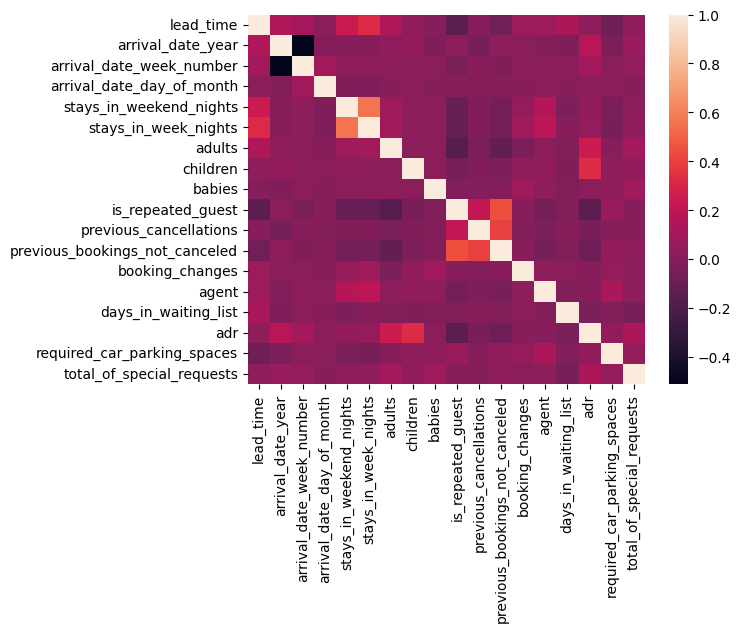

In [38]:
sns.heatmap(cc)
plt.show()

y=df['is_canceled']


In [39]:
df['is_canceled'] = df['is_canceled'].astype(bool)


In [40]:
numerical

['lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [41]:
r=['lead_time',
 'arrival_date_year',
 
 'stays_in_week_nights',]

<Axes: xlabel='lead_time', ylabel='adr'>

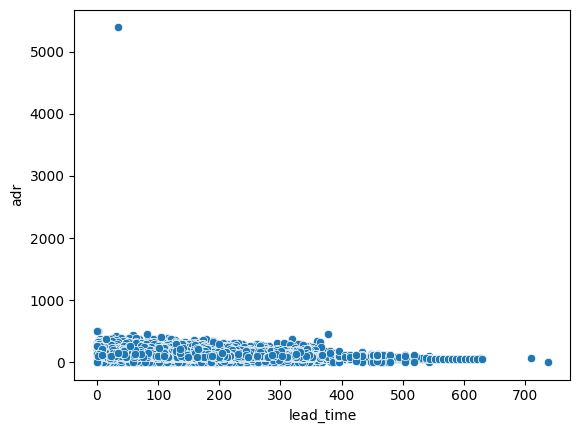

In [42]:

sns.scatterplot(num_data,x='lead_time',y= 'adr'
)

In [43]:
num_data.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,85627.000000,85627.000000,85627.000000,85627.000000,85627.000000,85627.000000,85627.000000,85627.000000,85627.000000,85627.000000,85627.000000,85627.000000,85627.000000,85627.000000,85627.000000,85627.000000,85627.000000,85627.000000
mean,79.428942,2016.214103,26.823350,15.809231,1.009588,2.635232,1.881953,0.141159,0.011036,0.039824,0.031042,0.187768,0.270662,82.572051,0.685602,106.622436,0.085767,0.703633
std,85.505064,0.685409,13.666493,8.840652,1.034528,2.062800,0.626876,0.459598,0.114703,0.195546,0.372913,1.749484,0.729544,109.194411,9.615604,55.307263,0.283874,0.833527
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,72.145000,0.000000,0.000000
50%,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,98.570000,0.000000,1.000000
75%,124.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,135.000000,0.000000,1.000000
max,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


In [44]:
p=['adr','lead_time']


<Axes: >

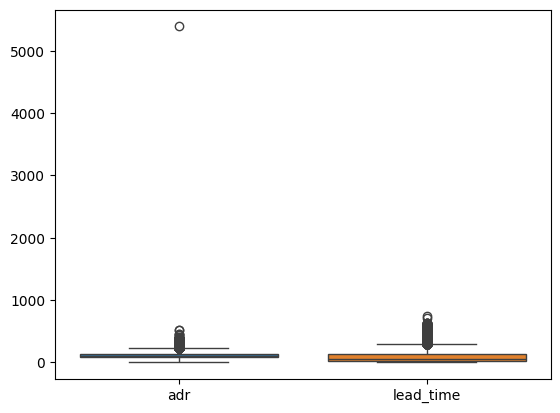

In [45]:
sns.boxplot(num_data[p],)

# Transform the numerical data using the Power transform.


In [46]:
p=['adr','lead_time']


In [47]:
power_transformer = PowerTransformer()
num_data.loc[:,p] = power_transformer.fit_transform(num_data.loc[:,p])

C:\Users\admin\AppData\Local\Temp\ipykernel_12200\3380456742.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.83416499  2.79314295 -0.99645161 ... -0.17329011  0.69805097
  1.28657678]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  num_data.loc[:,p] = power_transformer.fit_transform(num_data.loc[:,p])


In [48]:
num_data

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,1.834165,2015,27,1,0,0,2,0.0,0,0,0,0,3,9.0,0,-2.937950,0,0
1,2.793143,2015,27,1,0,0,2,0.0,0,0,0,0,4,9.0,0,-2.937950,0,0
2,-0.996452,2015,27,1,0,1,1,0.0,0,0,0,0,0,9.0,0,-0.525412,0,0
3,-0.717889,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0,-0.525412,0,0
4,-0.680898,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,-0.063392,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,-0.412033,2017,35,30,2,5,2,0.0,0,0,0,0,0,394.0,0,-0.099122,0,0
119386,0.641321,2017,35,31,2,5,3,0.0,0,0,0,0,0,9.0,0,1.986133,0,2
119387,-0.173290,2017,35,31,2,5,2,0.0,0,0,0,0,0,9.0,0,0.975882,0,4
119388,0.698051,2017,35,31,2,5,2,0.0,0,0,0,0,0,89.0,0,0.057654,0,0


# scale the data

In [49]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(num_data)
X_scaled.shape


(85627, 18)

In [50]:
R=np.hstack((X_scaled,X_new))


In [51]:
R.shape

(85627, 997)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(R, y, test_size=0.2, random_state=42)


In [53]:
model = GaussianNB()
model.fit(X_train, y_train)



GaussianNB()

In [54]:
dt=tree.DecisionTreeClassifier(max_depth=2)

In [55]:
dt.fit(X_train, y_train)




DecisionTreeClassifier(max_depth=2)